In [7]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [9]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [10]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-70.8362893632625 164.2996207918968
32.323464093818714 -51.79398050858518
63.434726088451356 109.12948661176392
55.13645668905275 -29.366553902860716
-56.66684709477969 -147.22506789487784
76.5426378002501 -76.60109264651821
69.80981110834068 117.77798626314558
-48.90297394088181 175.6520993742792
12.9683510328326 -55.20797845189671
-45.10868492352668 162.68271603270148
80.60625645192016 -18.284243560477023
-41.692088965779995 132.54047495835772
-1.9951698285973691 -83.71551086246245
31.471202885852676 90.66779193077394
56.71333922405435 -143.82345596823876
35.545207417633335 23.4585216688574
-30.408101680646652 -154.73660725935468
34.324604265917344 156.9382606291415
-25.015210419938498 -137.87162454382792
-52.194315953042974 122.0599928224758
34.66244936686306 36.67596922274507
17.337546397854368 38.361824195306866
80.57375393952384 1.8289153561842397
62.00338631987944 127.72540775475125
79.2926926760874 177.09728090177492
-21.414273332033645 11.728983080089336
-68.87695517067816 46.

In [11]:
from citipy import citipy

In [12]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

607

In [13]:
import requests
from config import weather_api_key

In [14]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [15]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [17]:
# Create an empty list to hold the weather data.
city_data = []
#Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the citites in our list.
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities. 
    try:
        # Parse the JSON and retrieve data. 
        city_weather = requests.get(city_url).json()
        # Parse out what we need. 
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city info into city_data
        city_data.append({"City": city.title(),
        "Lat": city_lat, "Lng": city_lng, "Max Temp": city_max_temp, "Humidity": city_humidity,
        "Cloudiness": city_clouds, "Wind Speed": city_wind, "Country": city_country, "Date": city_date})
    
    # If an error is experienced, skip the city. 
    except:
        print("City not found. Skipping...")
        pass 
    
# Indicate the Data Loading is complete. 
print("---------------------------")
print("Data Retrieval Complete    ")
print("---------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | saint george
Processing Record 3 of Set 1 | yerbogachen
Processing Record 4 of Set 1 | grindavik
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | qaanaaq
Processing Record 7 of Set 1 | saskylakh
Processing Record 8 of Set 1 | dunedin
Processing Record 9 of Set 1 | bathsheba
Processing Record 10 of Set 1 | te anau
Processing Record 11 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 12 of Set 1 | port lincoln
Processing Record 13 of Set 1 | salinas
Processing Record 14 of Set 1 | lasa
Processing Record 15 of Set 1 | palmer
Processing Record 16 of Set 1 | platanos
Processing Record 17 of Set 1 | avera
Processing Record 18 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | masyaf
Processing Record 22 of Set 

In [18]:
len(city_data)

555

In [19]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.6000,168.3333,45.09,77,9,1.70,NZ,2022-07-24 03:02:36
1,Saint George,37.1041,-113.5841,98.64,20,88,3.00,US,2022-07-24 02:58:36
2,Yerbogachen,61.2767,108.0108,75.54,60,85,7.56,RU,2022-07-24 03:02:37
3,Grindavik,63.8424,-22.4338,48.67,93,75,6.91,IS,2022-07-24 03:02:37
4,Mataura,-46.1927,168.8643,47.48,68,3,0.47,NZ,2022-07-24 03:00:34
5,Qaanaaq,77.4840,-69.3632,37.49,99,100,1.36,GL,2022-07-24 03:02:37
6,Saskylakh,71.9167,114.0833,64.31,60,10,4.74,RU,2022-07-24 03:02:38
7,Dunedin,-45.8742,170.5036,49.80,62,0,8.01,NZ,2022-07-24 03:00:29
8,Bathsheba,13.2167,-59.5167,81.05,85,3,14.65,BB,2022-07-24 03:02:38
9,Te Anau,-45.4167,167.7167,47.71,74,20,0.67,NZ,2022-07-24 03:00:51


In [32]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bluff,NZ,2022-07-24 03:02:36,-46.6000,168.3333,45.09,77,9,1.70
1,Saint George,US,2022-07-24 02:58:36,37.1041,-113.5841,98.64,20,88,3.00
2,Yerbogachen,RU,2022-07-24 03:02:37,61.2767,108.0108,75.54,60,85,7.56
3,Grindavik,IS,2022-07-24 03:02:37,63.8424,-22.4338,48.67,93,75,6.91
4,Mataura,NZ,2022-07-24 03:00:34,-46.1927,168.8643,47.48,68,3,0.47
5,Qaanaaq,GL,2022-07-24 03:02:37,77.4840,-69.3632,37.49,99,100,1.36
6,Saskylakh,RU,2022-07-24 03:02:38,71.9167,114.0833,64.31,60,10,4.74
7,Dunedin,NZ,2022-07-24 03:00:29,-45.8742,170.5036,49.80,62,0,8.01
8,Bathsheba,BB,2022-07-24 03:02:38,13.2167,-59.5167,81.05,85,3,14.65
9,Te Anau,NZ,2022-07-24 03:00:51,-45.4167,167.7167,47.71,74,20,0.67


In [21]:
# Create the output file(CSV)
output_data_file = "weather_data/cities.csv"
#Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

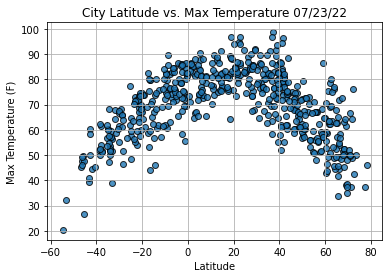

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

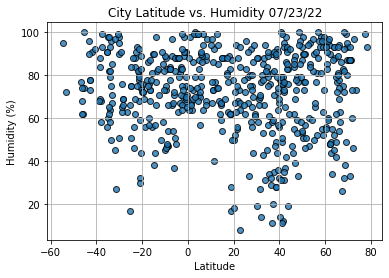

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

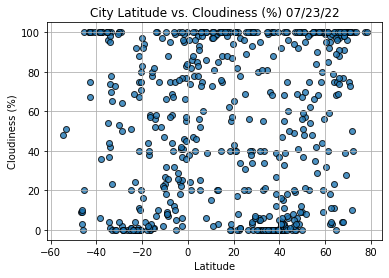

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

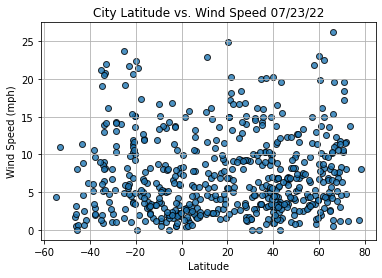

In [26]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [37]:
# Import lineregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
#and plot a regression line and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slpe and intercept
    regress_values = x_values * slope + intercept
    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [38]:
index13 = city_data_df.loc[13]
index13

City                       Palmer
Country                        US
Date          2022-07-24 03:02:40
Lat                       42.1584
Lng                      -72.3287
Max Temp                    78.39
Humidity                       72
Cloudiness                     33
Wind Speed                   4.36
Name: 13, dtype: object

In [39]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

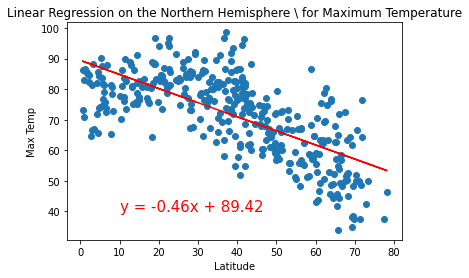

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \ for Maximum Temperature', 'Max Temp', (10,40))


In [41]:
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

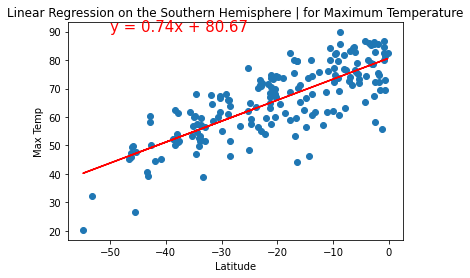

In [43]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function for southern hemi
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere | for Maximum Temperature', 'Max Temp',(-50,90))

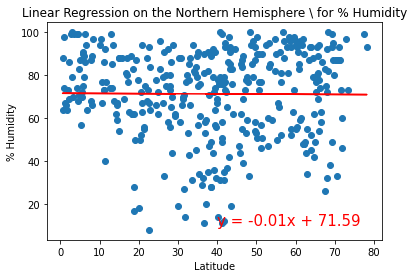

In [44]:
#Perform linear regression for percent humidity nother hemi
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \ for % Humidity', '% Humidity', (40,10))

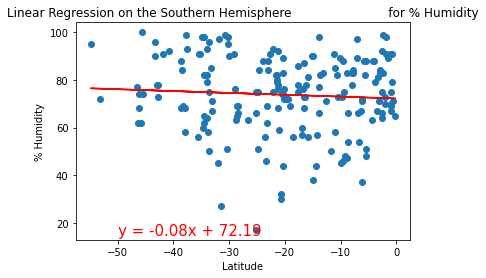

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

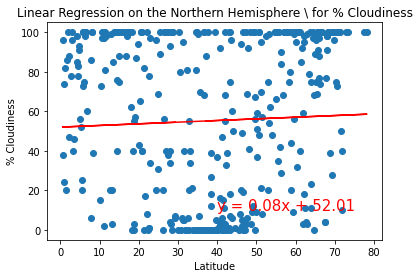

In [46]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \ for % Cloudiness', '% Cloudiness', (40,10))

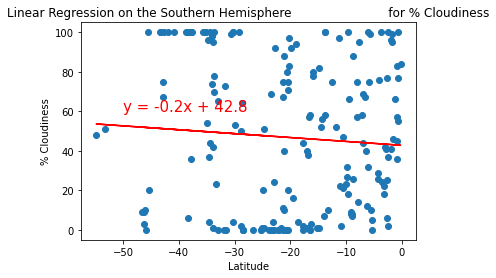

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

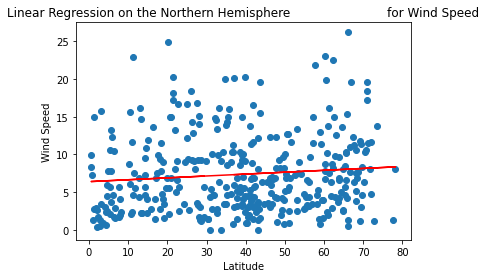

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

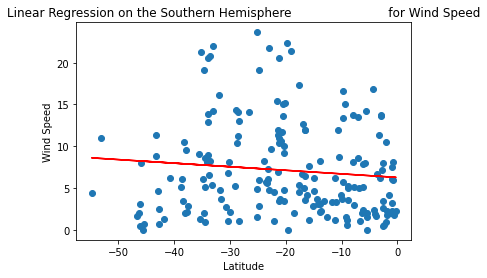

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))